In [1]:
import matplotlib.pyplot as plt
import time
import torch
from torch import logsumexp
import torch.nn.functional as F
from torch.distributions.normal import Normal

import numpy as np
from utils_v2 import *
from plots import *
from objectives_v2 import *

In [2]:
## training parameters
STEPS = 2000
NUM_SAMPLES = 5
LEARNING_RATE = 1e-2
# ## model parameters
# p_mu = torch.tensor([0.0])
# p_sigma = torch.tensor([1.0])
# q_mu = torch.tensor([8.0], requires_grad=True)
# q_sigma = torch.tensor([2.0], requires_grad=True) 
# ## initialize optimizer
# optimizer = torch.optim.SGD([q_mu, q_sigma], lr=LEARNING_RATE)

In [17]:
## model parameters
p_mu = torch.tensor([0.0])
p_sigma = torch.tensor([1.0])
q_mu = torch.tensor([8.0], requires_grad=True)
q_sigma = torch.tensor([2.0], requires_grad=True) 
## initialize optimizer
optimizer = torch.optim.SGD([q_mu, q_sigma], lr=LEARNING_RATE)

%time ELBOs, ESSs, KLs = train(mc, q_mu, q_sigma, p_mu, p_sigma, STEPS, NUM_SAMPLES, optimizer)

CPU times: user 2.26 s, sys: 49.7 ms, total: 2.31 s
Wall time: 2.31 s


In [18]:
## model parameters
p_mu = torch.tensor([0.0])
p_sigma = torch.tensor([1.0])
q_mu = torch.tensor([8.0], requires_grad=True)
q_sigma = torch.tensor([2.0], requires_grad=True) 
## initialize optimizer
optimizer = torch.optim.SGD([q_mu, q_sigma], lr=LEARNING_RATE)
%time ELBOs_d, ESSs_d, KLs_d = train(mc_dreg, q_mu, q_sigma, p_mu, p_sigma, STEPS, NUM_SAMPLES, optimizer)

CPU times: user 1.76 s, sys: 50.7 ms, total: 1.81 s
Wall time: 1.81 s


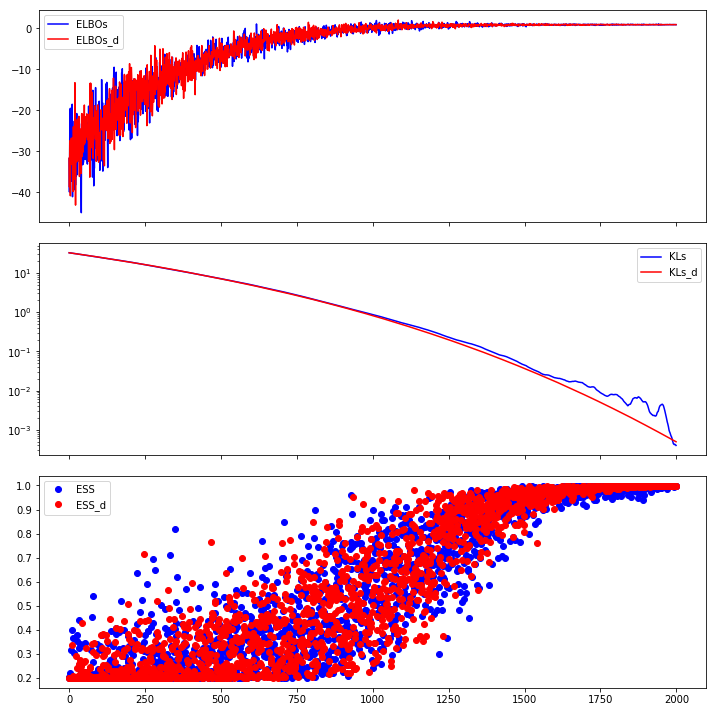

In [19]:
def plot_results(ELBOs, ESSs, KLs, ELBOs_d, ESSs_d, KLs_d, num_samples):
    fig = plt.figure(figsize=(10,10))
    ax1, ax2, ax3 = fig.subplots(3, 1, sharex=True)
    plt.tight_layout()
    ax1.plot(np.array(ELBOs) * (-1), 'b', label='ELBOs')
    ax1.plot(np.array(ELBOs_d) * (-1), 'r', label='ELBOs_d')
    ax1.legend()
    ## KL
    ax2.set_yscale('log')
    ax2.plot(KLs, 'b', label='KLs')
    ax2.plot(KLs_d, 'r', label='KLs_d')
    ax2.legend()
    ## ESS
    ax3.plot( np.array(ESSs) / num_samples, 'bo', label='ESS')
    ax3.plot( np.array(ESSs_d) / num_samples, 'ro', label='ESS_d')
    ax3.legend()
plot_results(ELBOs, ESSs, KLs, ELBOs_d, ESSs_d, KLs_d, NUM_SAMPLES)